# Modele simple

dummy model se traduit par "modèle bête"

Première étape : clean data

In [40]:
import pandas as pd
from data_tools import DataTools

tools = DataTools()

df_initial = pd.read_csv("dataset.csv", sep=",", index_col=False)
df_modifie = tools.clean_data(df_initial)
df_modifie.to_csv("clean_dataset.csv", index=False)

Deuxième étape : split data

In [41]:
import sklearn.model_selection as sklms
import numpy as np

df = pd.read_csv("clean_dataset.csv", sep=",", index_col=False)

#data_original = np.array(df, dtype=float)
y = df['charges']
X = df.drop('charges', axis=1)

# pour pouvoir comparer le score
X_train, X_test, y_train, y_test = sklms.train_test_split(X, y, shuffle=True, train_size=0.85, random_state=42, stratify=X['is_smoker'])


Troisième étape : model choice

In [42]:
import sklearn.linear_model as skllm

model = skllm.Lasso(alpha=1)
model.fit(X_train, y_train)


Lasso(alpha=1)

In [43]:
#coeffiscients
for i in range(len(X_train.columns.array)):
    colname = X_train.columns.array[i]
    coeff = model.coef_[i]
    print(f"{colname} : {coeff}")

age : 264.2993839998721
bmi : 322.7779994730866
children : 415.39457584894757
is_male : -165.76946222680562
is_smoker : 23877.085703801815
is_north : 912.7700924381907
is_west : -81.42385850092808


Quatrième étape : vérification

In [44]:
score = model.score(X_test, y_test)
print(f"  score  = {score} ")

y_predicted = model.predict(X_test)


import sklearn.metrics as skl_metrics

rmse = skl_metrics.root_mean_squared_error(y_test, y_predicted)
Rsquare = skl_metrics.r2_score(y_test, y_predicted)

print(f"r2_score = {Rsquare} ")
print(f"sklearn.metrics.mean_squared_error = {rmse}]")

  score  = 0.7807370416632928 
r2_score = 0.7807370416632928 
sklearn.metrics.mean_squared_error = 5665.914016033289]


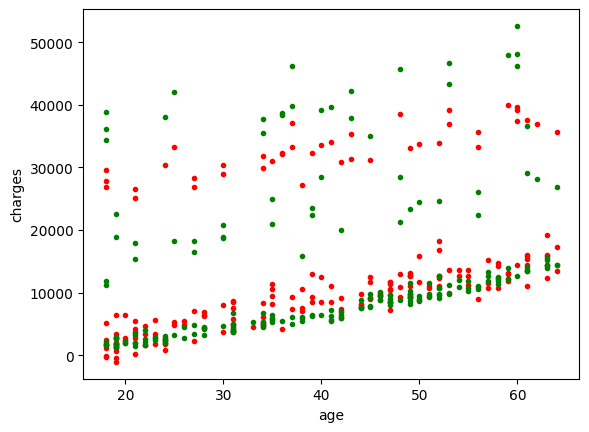

In [45]:
import matplotlib.pyplot as plt

#Charges = f ( age )
plt.xlabel("age")
plt.ylabel("charges")
plt.plot(X_test["age"], y_predicted, "r.")
plt.plot(X_test["age"], y_test, "g.")
plt.show()